Jednowymiarowy ruch pieszego opisany jest równaniem:
$$ m_i\frac{\operatorname{d}\!v_i}{\operatorname{d}\!t} = F_i $$
Gdzie 
$$ F_i = F_{i}^{drv} + F_{i}^{rep} $$
Pierwszy składnik związany jest z zamierzoną prędkością pieszego, do której dąży w swoim ruchu i wyraża się wzorem:
$$ F_{i}^{drv} = m_i \frac{v_i^0 - v_i}{\tau_i} $$
gdzie $\tau$ jest parametrem przyspieszenia. Wybieramy parametr ten stały dla wszystkich pieszych i równy $\tau = 0.61$ (zgodnie z [1] strona 4)

Drugi składnik $F_i^{rep}$ związany jest z kolei z odległością pomiędzy poszczególnymi pieszymi. W pierwszym przybliżeniu czynnik ten pomijamy.

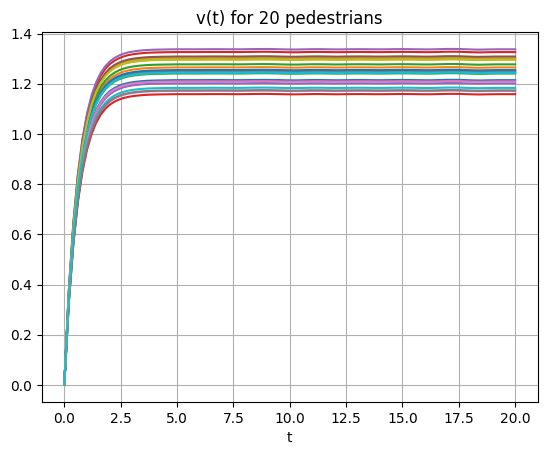

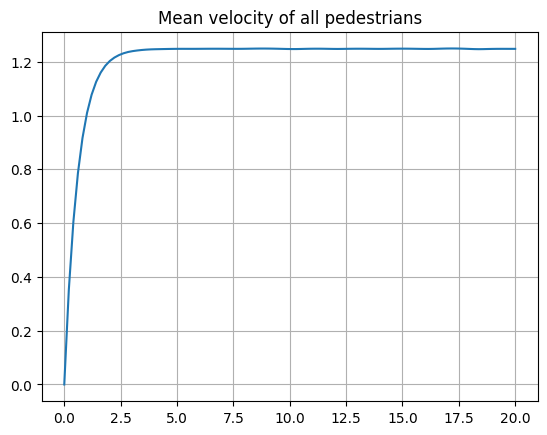

In [4]:
## rozwiązanie z użyciem wbudownych funkcji - prędkość
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#simplified equation od pedestrian 
def pedestrian_vel(t,v, v0, tau):
    dvdt = (v0 - v)/tau
    return dvdt

v0s = np.random.normal(1.24, 0.05, 20) #zgodnie z [1] strona 4
tau = 0.61

#initial conditions
v_0 = 0  
t = np.linspace(0,20,100)
time_step = 20/100

#using explicit Runge-Kutta method of order 5(4)
sol = [ (solve_ivp(pedestrian_vel, (0.0,20.0),[0], method = 'RK45', args = (v0,tau), t_eval = t)).y[0] for v0 in v0s]
for i in range(20):
    plt.plot(t, sol[i])
plt.title("v(t) for 20 pedestrians")
plt.xlabel('t')
plt.grid()
plt.show()

mean_vel = np.mean(sol, axis =0)
plt.plot(t, mean_vel)
plt.title("Mean velocity of all pedestrians")
plt.grid()
plt.show()

In [3]:
#położenie
#przyjmujemy przestrzeń o długości 20m


Bibliografia:

[1] Basics of modelling the pedestrian flow - Armin Seyfried, Bernhard Steffen, Thomas Lippert